In [1]:
import biolqm, ginsim, maboss

In [2]:
biolqm_model = biolqm.load("Apoptosis.sbml")

Here the problem is that nodeID are not informative enough

# computing graph layout...


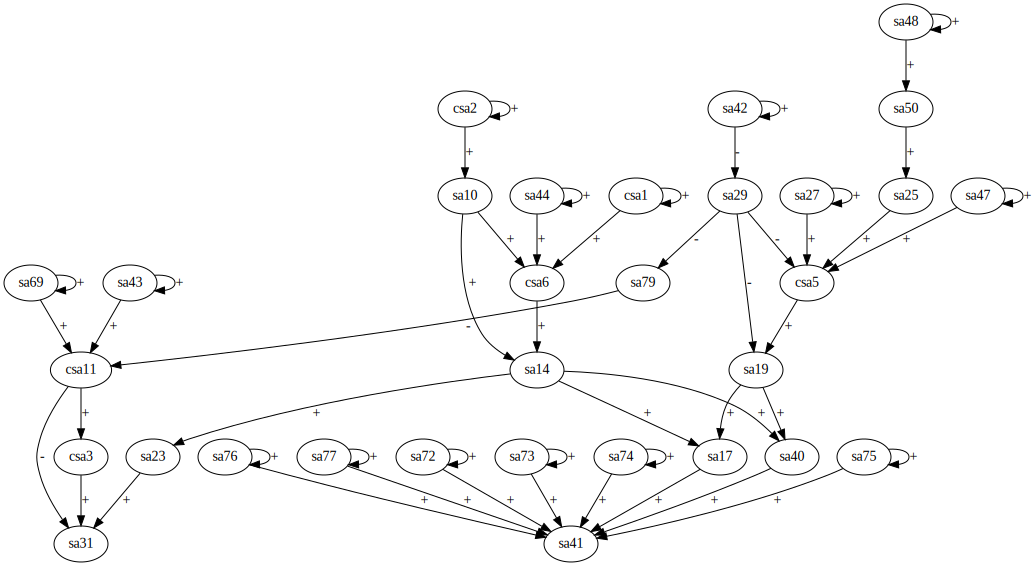

In [3]:
biolqm.to_minibn(biolqm_model).influence_graph()

But the node names are 

In [4]:
{component.getNodeID(): component.getName() for component in biolqm_model.getComponents()}

{'csa2': 'FAS/FASL_complex',
 'csa3': 'BAD/BBC3/BCL2L11_complex',
 'csa5': 'Apoptosome_complex',
 'csa1': 'TNF/TNFRSF1A_complex',
 'csa6': 'TRADD/FADD_complex',
 'csa11': 'BCL2/MCL1/BCL2L1_complex',
 'sa10': 'FADD',
 'sa14': 'CASP8',
 'sa17': 'CASP3',
 'sa19': 'CASP9_Cytoplasm',
 'sa23': 'BID',
 'sa25': 'CYCS',
 'sa27': 'APAF1',
 'sa29': 'AKT1',
 'sa31': 'BAX',
 'sa40': 'CASP7',
 'sa41': 'Apoptosis_phenotype',
 'sa42': 'M',
 'sa43': 'Orf7a',
 'sa44': 'TRADD',
 'sa47': 'CASP9_Cytoplasm',
 'sa48': 'Orf3a',
 'sa50': 'MAPK14',
 'sa69': 'E',
 'sa72': 'Orf3b',
 'sa73': 'Orf8a',
 'sa74': 'N',
 'sa75': 'Orf6',
 'sa76': 'S',
 'sa77': 'Orf9b',
 'sa79': 'BAD'}

So we rename all the nodeIDs by their names

In [5]:
# Renaming node ids
for component in biolqm_model.getComponents():
    new_id = component.getName().replace("/", "_")
    component.setNodeID(new_id)

# computing graph layout...


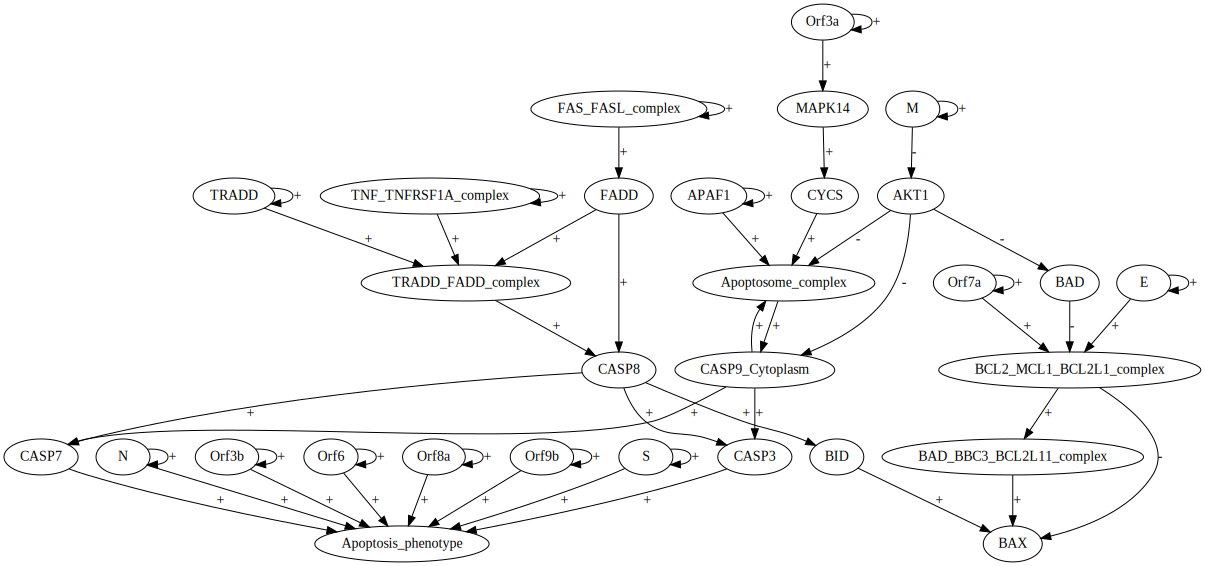

In [6]:
biolqm.to_minibn(biolqm_model).influence_graph()

Then we convert it to MaBoSS, and save it

In [7]:
maboss_model = biolqm.to_maboss(biolqm_model)

In [8]:
maboss_model.print_bnd(open("Apoptosis.bnd", "w+"))
maboss_model.print_cfg(open("Apoptosis.cfg", "w+"))